We propose various synthetic targets, constructed from multivariate Student distributions. These targets include two main classes, each available for different degrees of freedom:
* Plain Student distributions whose covariance matrices have adjustable condition number,
* Heavy-tailed banana-shaped distributions.

In [82]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

In [21]:
def matrix_condition(d,cond):
    #returns a symmetric positive definite matrix of size d with condition number cond
    y = np.random.uniform(-1,1,d)
    Y = np.eye(d) - ( 2 / sum(y**2) )*np.outer(y,y)
    D = np.diag([ np.exp( (i/(d-1)) * np.log(cond)) for i in range(d)])
    return Y @ D @ Y

In [59]:
def unnormalized_logpdf_Student(x, dof, loc, inv_shape):
    d = len(x)
    assert len(loc) == d and np.shape(inv_shape) == (d,d)
    
    gap = x - loc
    return -0.5*(dof+len(x)) * np.log( 1 + (1/dof) * np.inner(gap, inv_shape@gap))

In [42]:
def normalization_Student(d, dof, shape):
    return (gamma(dof/2) * ((dof * np.pi)**(d/2)) * np.sqrt(np.linalg.det(shape)) ) / gamma((dof+d)/2)

We are now ready to create some target distributions in the family of Student distributions. As an example, we create below a target in dimension 2, with $\nu = 2.5$ and a shape matrix with condition number equal to $20$.

In [109]:
d = 2
dof = 2.5
condition_nb = 10
shape = matrix_condition(d,condition_nb)
inv_shape = np.linalg.inv(shape)
loc = np.random.uniform(-1,1,d)

Z = normalization_Student(d, dof, shape)
log_pi_tilde = lambda x: unnormalized_logpdf_Student(x, dof, loc, inv_shape)

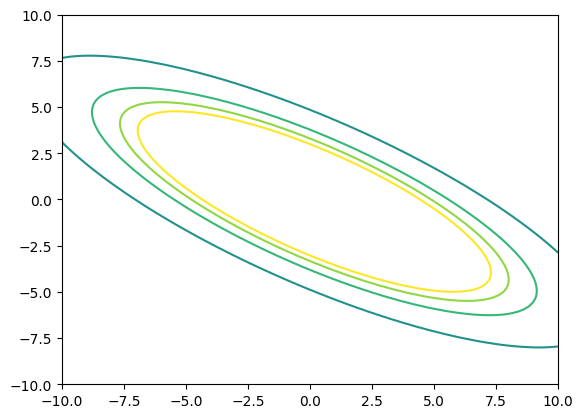

In [110]:
# Generate a grid of points
nb_points = 100
X = np.linspace(-10, 10, nb_points)
Y = np.linspace(-10, 10, nb_points)


pdf = np.zeros((nb_points, nb_points))
for i in range(nb_points):
    for j in range(nb_points):
        pdf[i,j] = np.exp(log_pi_tilde([X[i], Y[j]])) / Z

        
# plot
fig, ax = plt.subplots()
ax.contour(X, Y, pdf, levels=levels)
plt.show()

We now define some additional tools to create banana-shaped heavy-tailed targets.

In [119]:
def banana_transform(x, b, c):
    res = np.copy(x)
    res[1] = x[1] + b*(x[0]**2 - c**2)
    return res

In [120]:
def unnormalized_logpdf_banana(x, dof, b, c):
    d = len(x)
    assert d >= 2
    diag = np.concatenate( (np.array([1 / c**2]),np.ones(d-1)) )
    return unnormalized_logpdf_Student(banana_transform(x,b,c), dof, np.zeros(d), np.diag(diag))

In [121]:
def normalization_banana(d, dof, b, c):
    assert d >= 2
    diag = np.concatenate( (np.array([1 / c**2]),np.ones(d-1)) )
    return normalization_Student(d, dof, np.diag(diag))
    #we take advantage of the fact that the "banana transformation" preserves the normalization constant

We can now create some banana-shaped target distributions with adjustable degrees of freedom. Note that we can also adjust the curve of the banana through the parameters $b$ and $c$. We build below as an example a banana-shaped target with moderate curvature in dimension $2$, with $\nu = 2.5$ degrees of freedom.

In [122]:
d = 2
dof = 2.5
b = 0.1
c = 10

Z = normalization_banana(d, dof, b, c)
log_pi_tilde = lambda x: unnormalized_logpdf_banana(x, dof, b, c)

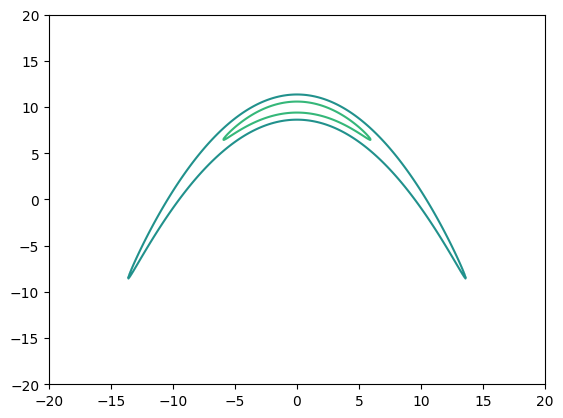

In [125]:
# Generate a grid of points
nb_points = 500
X = np.linspace(-20, 20, nb_points)
Y = np.linspace(-20, 20, nb_points)


pdf = np.zeros((nb_points, nb_points))
for i in range(nb_points):
    for j in range(nb_points):
        pdf[j,i] = np.exp(log_pi_tilde([X[i], Y[j]])) / Z

        
# plot
fig, ax = plt.subplots()

ax.contour(X, Y, pdf, levels=levels)

plt.show()